# Import Libraries

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 1.6 MB 57.2 MB/s 
     |████████████████████████████████| 438 kB 51.5 MB/s 
     |████████████████████████████████| 5.8 MB 62.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
from google.colab import drive
from tensorflow.keras import metrics

# LOAD TENSORFLOW DATASET

In [ ]:
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
batch_size=32
h, w = 256, 256

train_dataset = tf.keras.utils.image_dataset_from_directory(
  "../content/drive/My Drive/Dataset/BISINDO/datatrain/",
  seed=123,
  image_size=(h,w),
  batch_size=batch_size)

Found 2080 files belonging to 26 classes.


In [ ]:
batch_size=32
h, w = 256, 256

test_dataset = tf.keras.utils.image_dataset_from_directory(
  "../content/drive/My Drive/Dataset/BISINDO/datatest/",
  seed=123,
  image_size=(h,w),
  batch_size=batch_size)

Found 416 files belonging to 26 classes.


In [ ]:
batch_size=32
h, w = 256, 256

val_dataset = tf.keras.utils.image_dataset_from_directory(
  "../content/drive/My Drive/Dataset/BISINDO/dataval/",
  seed=123,
  image_size=(h,w),
  batch_size=batch_size)

Found 416 files belonging to 26 classes.


In [ ]:
class_citra = train_dataset.class_names
print("Nama Label  : ", class_citra)
print("Total Label : ", len(class_citra))

Nama Label  :  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Total Label :  26


# VISUALISASI CITRA DATASET

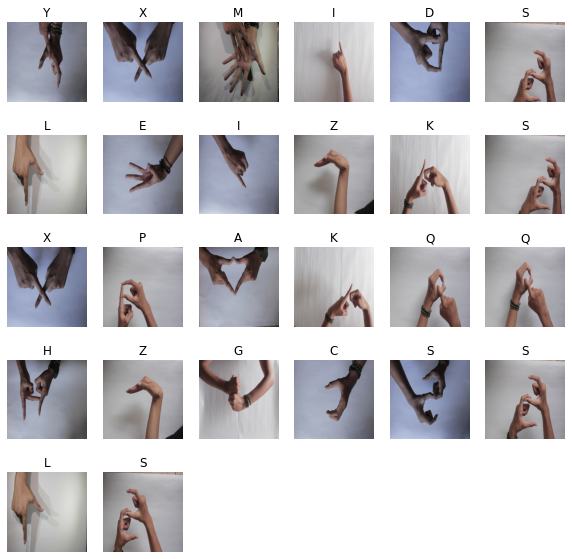

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(26):
    ax = plt.subplot(5,6 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_citra[labels[i]])
    plt.axis("off")

In [ ]:
y_train = np.concatenate([y for x, y in train_dataset], axis=0)
y_test = np.concatenate([y for x, y in test_dataset], axis=0)
y_val = np.concatenate([y for x, y in val_dataset], axis=0)

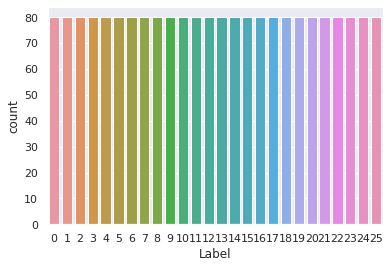

In [ ]:
# Visualization count Label From Train Dataset
label_train = pd.DataFrame(y_train, columns=['Label'])

import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Label", data=label_train)

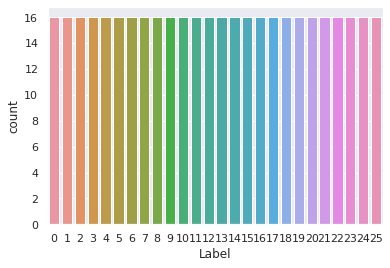

In [ ]:
# Visualization count Label From Test Dataset
label_test = pd.DataFrame(y_test, columns=['Label'])

import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Label", data=label_test)

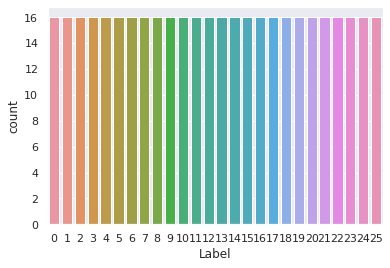

In [ ]:
# Visualization count Label From Validation Dataset
label_val = pd.DataFrame(y_val, columns=['Label'])

import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Label", data=label_val)

# MODELLING CNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
  #Layer Konvolusi 1 / Layer Input                  
  layers.Rescaling(1./255, input_shape=(h, w, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Layer Konvolusi 2
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Layer Konvolusi 3
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Fully Connected Layer
  layers.Flatten(),

  #Hidden Layers
  layers.Dense(128, activation='relu'),

  #Output Layers
  layers.Dense(26,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['sparse_categorical_accuracy'])

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 33.4 MB/s 


# VISUALISASI MODEL

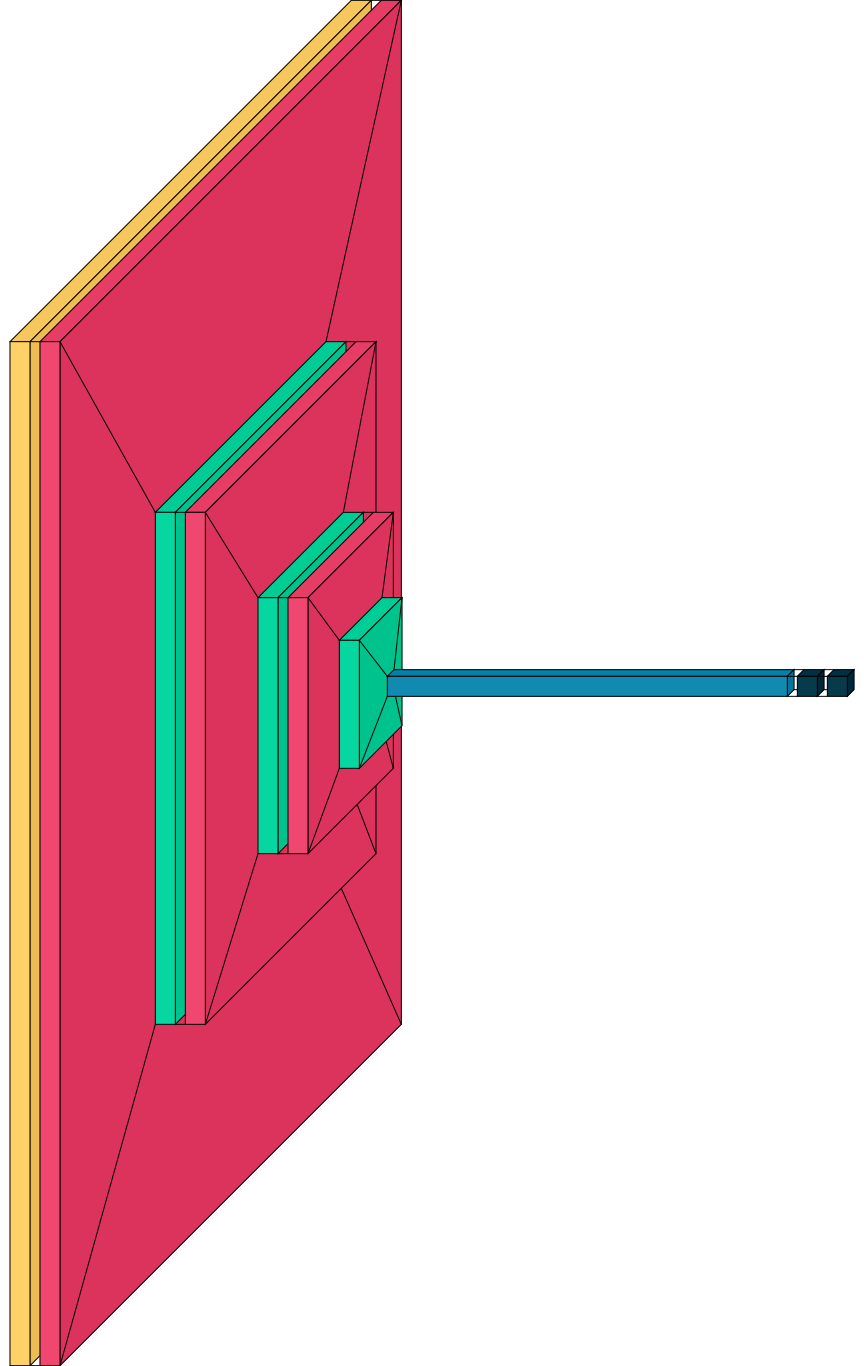

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # Menampilkan Model yang telah dibuat
##visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='BISINDO.png').show() # simpan dan menampilkannya

visualkeras.layered_view(model)

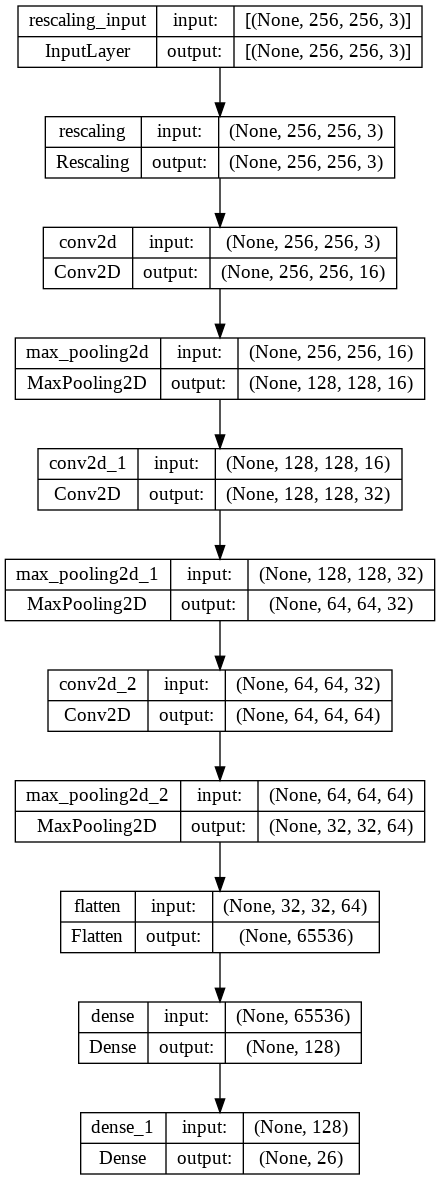

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='Model_BISINDO.png', show_shapes=True)

# TRAINING MODEL

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(
    train_dataset,
    batch_size = 32,
    validation_data=val_dataset,
    validation_batch_size = 32,
    epochs = 20,
    callbacks = [tensorboard_callback]
)

Epoch 1/20
65/65 [==============================] - 199s 3s/step - loss: 2.0835 - sparse_categorical_accuracy: 0.4370 - val_loss: 0.5563 - val_sparse_categorical_accuracy: 0.8726
Epoch 2/20
65/65 [==============================] - 178s 3s/step - loss: 0.3754 - sparse_categorical_accuracy: 0.8865 - val_loss: 0.2352 - val_sparse_categorical_accuracy: 0.9375
Epoch 3/20
65/65 [==============================] - 175s 3s/step - loss: 0.1470 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.0941 - val_sparse_categorical_accuracy: 0.9639
Epoch 4/20
65/65 [==============================] - 172s 3s/step - loss: 0.0573 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.2241 - val_sparse_categorical_accuracy: 0.9303
Epoch 5/20
65/65 [==============================] - 170s 3s/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0270 - val_sparse_categorical_accuracy: 0.9928
Epoch 6/20
65/65 [==============================] - 176s 3s/step - loss: 0.0322 - sparse_categorical_accu

# EVALUATE MODEL

In [ ]:
model.evaluate(test_dataset)

13/13 [==============================] - 27s 1s/step - loss: 9.6706e-05 - sparse_categorical_accuracy: 1.0000


[9.6706127806101e-05, 1.0]

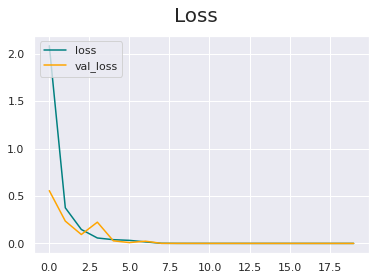

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

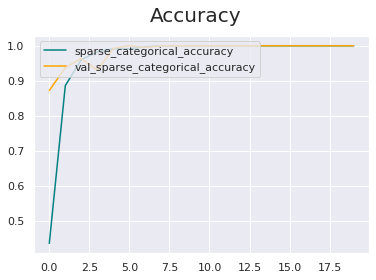

In [ ]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_pred = []  
y_true = []  


for image_batch, label_batch in test_dataset:   
  
   y_true.append(label_batch)
  
   preds = model.predict(image_batch)
   
   y_pred.append(np.argmax(preds, axis = - 1))

correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 1s 558ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        16
          17       1.00    

Text(84.5, 0.5, 'Class Asli')

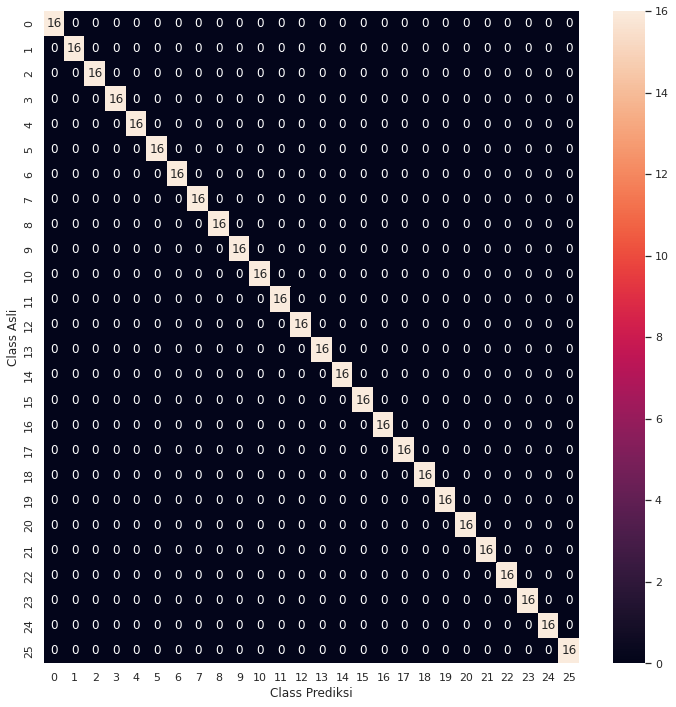

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=correct_labels,predictions=predicted_labels)

plt.figure(figsize = (12,12))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Class Prediksi')
plt.ylabel('Class Asli')

In [ ]:
model.save("MODEL_BISINDO.h5")

In [ ]:
model.save("MODEL_BISINDO.hdf5")

In [ ]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_citra[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 40ms/step


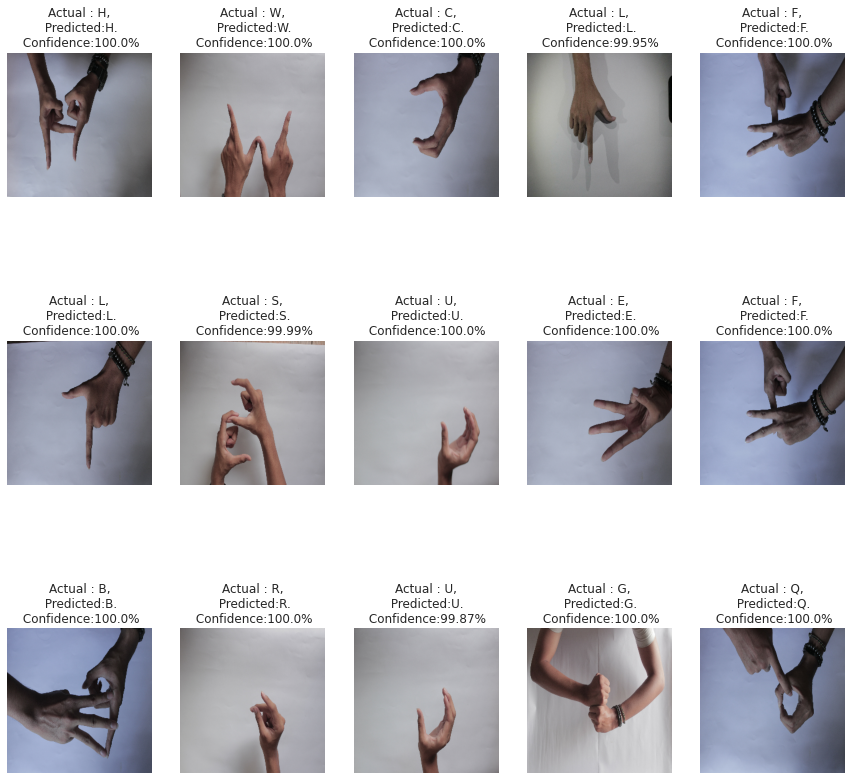

In [ ]:
plt.figure(figsize=(15, 15))

for images, labels in test_dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3,5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = class_citra[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        
        plt.axis("off")